## XGBoost

           Feature  Importance
0            AB_AN    0.093702
1            AB_AW    0.015703
2            AB_CR    0.023576
3            AB_AR    0.000000
4            AB_VR    0.006340
5            AB_AV    0.007006
6           AB_FIE    0.032676
7           AB_SIE    0.034330
8            AB_EA    0.020158
9            AB_EN    0.006386
10           AB_Nd    0.053321
11           AB_Nv    0.000000
12            AB_D    0.000000
13           AB_EC    0.006920
14           AB_TC    0.022452
15            C_AN    0.014324
16            C_AW    0.015727
17            C_CR    0.003419
18            C_AR    0.000000
19            C_VR    0.000000
20            C_AV    0.010636
21           C_FIE    0.000000
22           C_SIE    0.000000
23            C_EA    0.552212
24            C_EN    0.000000
25            C_Np    0.000000
26            C_Nv    0.000000
27             C_D    0.000000
28  CurrentDensity    0.081112
1.0000000253785402


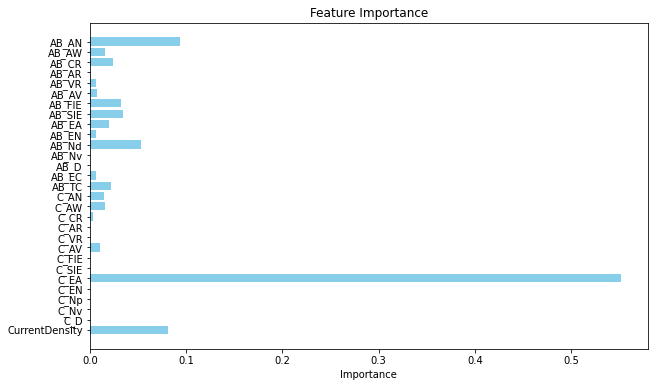

In [8]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import pickle


model = XGBRegressor()
with open('model/XGBoost_tuning_5.pkl', 'rb') as f:
    model = pickle.load(f) 

data = pd.read_csv('data/compound_feat5.csv').iloc[:, 1:]

importance = model.best_estimator_.feature_importances_

import numpy as np
cols = np.array(['AB_AN', 'AB_AW', 'AB_CR', 'AB_AR', 'AB_VR', 'AB_AV', 'AB_FIE',
       'AB_SIE', 'AB_EA', 'AB_EN', 'AB_Nd', 'AB_Nv', 'AB_D', 'AB_EC',
       'AB_TC', 'C_AN', 'C_AW', 'C_CR', 'C_AR', 'C_VR', 'C_AV', 'C_FIE',
       'C_SIE', 'C_EA', 'C_EN', 'C_Np', 'C_Nv', 'C_D', 'CurrentDensity'])

importance_df = pd.DataFrame({
    'Feature': cols,
    'Importance': importance
})




print(importance_df)
print(sum(importance_df['Importance'].values))

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


## permutation_importance

In [5]:
import numpy as np
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import pickle
from sklearn.model_selection import train_test_split


model = XGBRegressor()
with open('model/XGBoost_tuning_5.pkl', 'rb') as f:
    model = pickle.load(f) 

np.random.seed(42)
data = pd.read_csv('data/compound_feat5.csv').iloc[:,1:]
data['target'] = pd.qcut(data['label'], q=10, labels=False)
train_df, test_df = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=43)

samples = train_df[train_df['label'] < 1.2]
train_df = pd.concat([train_df, samples], axis=0)
#train_df = pd.concat([train_df, samples], axis=0)
train_df = train_df.sample(frac=1).reset_index(drop=True)

train_df = train_df.drop(columns=['target'])
test_df = test_df.drop(columns=['target'])

X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1:].values
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1:].values

print('train data:', X_train.shape)
print('X_test data:', X_test.shape)

train data: (290, 29)
X_test data: (59, 29)


In [6]:
cols = data.columns[:-2]
cols_v2 = ['AB_AN', 'AB_AW', 'AB_CR', 'AB_AR', 'AB_VR', 'AB_AV', 'AB_FIE',
       'AB_SIE', 'AB_EA', 'AB_EN', 'AB_Nd', 'AB_Nv', 'AB_D', 'AB_EC',
       'AB_TC', 'C_AN', 'C_AW', 'C_CR', 'C_AR', 'C_VR', 'C_AV', 'C_FIE',
       'C_SIE', 'C_EA', 'C_EN', 'C_Np', 'C_Nv', 'C_D', 'CurrentDensity']

In [7]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, y_test,
                           n_repeats=30,
                           random_state=2024)
# print(r.importances.shape)

for i in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{cols_v2[i]:<8}"
#               f"{r.importances_mean[i]:.3f}"
#               f" +/- {r.importances_std[i]:.3f}")
    print(f"{cols_v2[i]:<8}"
          "                           "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

CurrentDensity                           0.091 +/- 0.017
C_EA                               0.016 +/- 0.004
AB_AN                              0.013 +/- 0.003
AB_TC                              0.012 +/- 0.003
AB_Nd                              0.010 +/- 0.003
AB_FIE                             0.009 +/- 0.002
AB_EA                              0.007 +/- 0.003
C_AN                               0.004 +/- 0.001
AB_CR                              0.003 +/- 0.001
AB_EC                              0.002 +/- 0.001
C_CR                               0.001 +/- 0.000
AB_VR                              0.001 +/- 0.000
AB_SIE                             0.001 +/- 0.000
C_AW                               0.001 +/- 0.000
AB_AV                              0.000 +/- 0.000
AB_AW                              0.000 +/- 0.000
C_AV                               0.000 +/- 0.000
AB_AR                              0.000 +/- 0.000
C_Np                               0.000 +/- 0.000
AB_Nv                    